# King County Housing 

Business Problem: Real Estate Investment Firm 

columns to avoid according to project intro
- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat 
- long
- sqft_living15
- sqft_lot 15


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as MSE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor 

In [2]:
#reading in dataframe
kc_house = pd.read_csv('data/kc_house_data.csv', parse_dates=['date'])

In [3]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [5]:
#dropping columns that I don't believe are necessary
kc_house.drop(['lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'id', 'waterfront'], axis=1, inplace=True)

#sanity check
kc_house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074


In [6]:
#defining X and y
X = kc_house.drop(columns='price')
y = kc_house['price']

In [7]:
#sanity check
print(X.shape)
X.head()

(21597, 12)


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,2014-10-13,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178
1,2014-12-09,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125
2,2015-02-25,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028
3,2014-12-09,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136
4,2015-02-18,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074


In [8]:
print(y.shape)
y.head()

(21597,)


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [9]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
#creating a train df and test df
train_kch = pd.concat([X_train, y_train], axis=1)
test_kch = pd.concat([X_test, y_test], axis=1)

-----------------

## EDA King Count House - training

In [11]:
#from now on using train_kch to make model decision
#sanity check
train_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,price
19709,2014-10-29,5,3.75,3330,5042,2.0,Average,9 Better,2470,860.0,2014,98103,1380000.0
4800,2015-05-05,3,2.00,1678,13862,1.0,Average,7 Average,1678,0.0,1994,98030,353000.0
13225,2014-10-27,4,1.00,1550,15239,1.5,Average,6 Low Average,1370,180.0,1930,98166,685000.0
16111,2014-08-29,3,2.50,2760,9471,1.0,Average,8 Good,1760,1000.0,1956,98115,800000.0
17711,2015-02-18,2,1.50,1400,5810,2.0,Average,7 Average,1400,0.0,1940,98103,575000.0


In [12]:
#null-value check
train_kch.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
price            0
dtype: int64

In [13]:
train_kch = train_kch.dropna().reset_index(drop=True)

No missing values great!

Now to take a deeper look at the sqft_basement column since it seems it should be numeric instead of categorical.

In [14]:
#change the dtype sqft_basement
train_kch['sqft_basement'].value_counts()

0.0       8576
?          305
600.0      145
500.0      142
700.0      140
          ... 
2330.0       1
3480.0       1
1248.0       1
475.0        1
2000.0       1
Name: sqft_basement, Length: 274, dtype: int64

Interesting find since there is a ? could this mean that there is no basement/unknown. There is already a substantial amount of a values equal to 0.0. Let's take a closer look at sqft_basement to price to see if its worth imputing the missing values for the model.

In [15]:
#first change question mark to 0.0 since could not find anything to what the ? mark mean
train_kch['sqft_basement'] = train_kch['sqft_basement'].str.replace('?', '0.0')

In [16]:
train_kch['sqft_basement'].value_counts()

0.0       8881
600.0      145
500.0      142
700.0      140
800.0      132
          ... 
516.0        1
862.0        1
1548.0       1
1930.0       1
2050.0       1
Name: sqft_basement, Length: 273, dtype: int64

In [17]:
#changing its dtype from object to float
train_kch['sqft_basement'] = train_kch['sqft_basement'].astype(float)

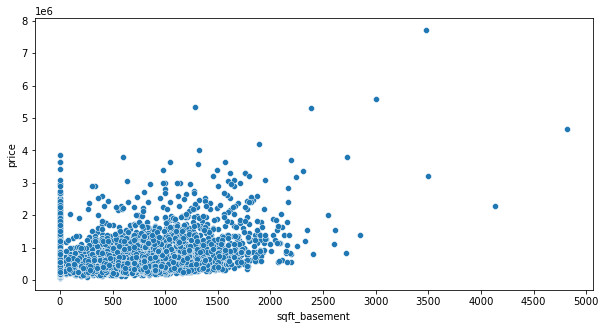

In [18]:
#make a quick plot showing the relationship between sqft_basement and price

plt.figure(figsize=(10, 5))
sns.scatterplot(data=train_kch, x="sqft_basement", y="price")
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]);

There is not a very linear relationship between sqft_basement and price. It already breaks one of the assumptions of Linear Regression; therefore it is not worth having this feature in the final model.

In [19]:
#Now having a look at the different features
train_kch['bedrooms'].value_counts()

3     6541
4     4624
2     1847
5     1094
6      183
1      132
7       33
8        8
9        4
10       2
11       1
Name: bedrooms, dtype: int64

In [20]:
#there are some outliers here such as 8 - 11 bedrooms

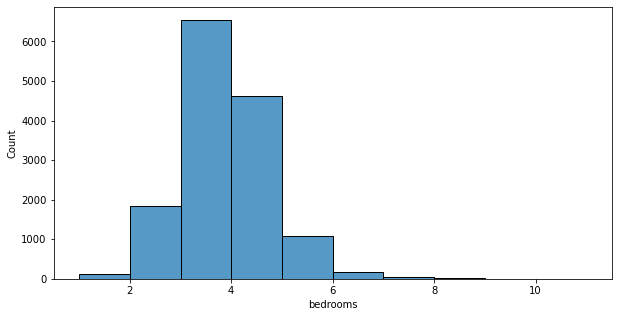

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_kch, x="bedrooms", binwidth=1);

Can have a threshold for the outliers or can just remove the values since taking away those values would give a more general idea; however since we don't have all day will look at a correlation matrix 

Instead and then go from there but will categorical variables first such as condition and grade.

In [22]:
#let's look and see which values are categorical once again 
train_kch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14469 entries, 0 to 14468
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           14469 non-null  datetime64[ns]
 1   bedrooms       14469 non-null  int64         
 2   bathrooms      14469 non-null  float64       
 3   sqft_living    14469 non-null  int64         
 4   sqft_lot       14469 non-null  int64         
 5   floors         14469 non-null  float64       
 6   condition      14469 non-null  object        
 7   grade          14469 non-null  object        
 8   sqft_above     14469 non-null  int64         
 9   sqft_basement  14469 non-null  float64       
 10  yr_built       14469 non-null  int64         
 11  zipcode        14469 non-null  int64         
 12  price          14469 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 1.4+ MB


From above you see that the categorical variables are: waterfront, condition, and grade. Let's look at the value counts for condition and grade since waterfront was already looked at.

- Condition: How good the overall condition of the house is. Related to maintenance of house.
- Grade: Overall grade of the house. Related to the construction and design of the house.

In [23]:
train_kch['condition'].value_counts() #maintenance of the house -- if you are trying to sell the house

Average      9406
Good         3775
Very Good    1153
Fair          118
Poor           17
Name: condition, dtype: int64

In [24]:
train_kch['grade'].value_counts() #construction and design of the house -- investment 

7 Average        6002
8 Good           4096
9 Better         1725
6 Low Average    1355
10 Very Good      769
11 Excellent      270
5 Fair            166
12 Luxury          62
4 Low              16
13 Mansion          7
3 Poor              1
Name: grade, dtype: int64

## OrdinalEncoder - categorical variables

Can do OrdinalEncoder directly on condition and grade but might be better to bin them since there are a fair amount of unique values for both which could cause multicollinearlity. 

For condition:
- Poor 
- Fair
- Average
- Good 
- Very Good

For grade:
- 7 Average
- 8 Good
- 9 Better
- 6 Low Average
- 10 Very Good
- 11 Excellent
- 5 Fair
- 12 Luxury
- 4 Low
- 13 Mansion
- 3 Poor

For zip:
- Seattle
- Suburban
- Rural

Can categorize condition values like:
<table>
  <tr>
    <th>Category</th>
    <th>Code</th>
  </tr>
  <tr>
    <td>Poor</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Fair</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Average</td>
    <td>2</td>
  </tr>
 <tr>
    <td>Good</td>
    <td>3</td>
  </tr> 
 <tr>
    <td>Very Good</td>
    <td>4</td>
  </tr>
</table>


Can categorize grade values like:
<table>
  <tr>
    <th>Category</th>
    <th>Code</th>
  </tr>
  <tr>
    <td>Poor</td>
    <td>3</td>
  </tr>
  <tr>
    <td>Low</td>
    <td>4</td>
  </tr>
  <tr>
    <td>Fair</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Low Average</td>
    <td>6</td>
  </tr>
  <tr>
    <td>Average</td>
    <td>7</td>
  </tr>
 <tr>
    <td>Good</td>
    <td>8</td>
  </tr> 
 <tr>
    <td>Better</td>
    <td>9</td>
 </tr>
 <tr>
    <td>Very Good</td>
    <td>10</td>
  </tr>
 <tr>
    <td>Excellent</td>
    <td>11</td>
  </tr>
 <tr>
    <td>Luxury</td>
    <td>12</td>
  </tr>
 <tr>
    <td>Mansion</td>
    <td>13</td>
  </tr>
</table>

Can categorize zone/zipcode values like:
<table>
  <tr>
    <th>Category</th>
    <th>Code</th>
  </tr>
  <tr>
    <td>Seattle</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Suburbs</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Rural</td>
    <td>2</td>
  </tr>
</table>

In [25]:
#creating a map for condition since there are low values of Poor and Fair compared to the other categorical variables
condition_map = {'Poor': 0,
                 'Fair': 1,
                 'Average': 2,
                 'Good': 3,
                 'Very Good': 4,
                }

#adding to train_kch
train_kch['cond_num'] = train_kch['condition'].map(condition_map)
train_kch.drop('condition', axis = 1, inplace=True);

In [26]:
#mapping grade map
grade_map = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13}

#adding in to train_kch
train_kch['grade_num'] = train_kch['grade'].map(grade_map)
train_kch.drop('grade', axis = 1, inplace=True);

In [27]:
#creating map for zipcodes
zip_map = {
    98001:'Suburbs', 98002:'Suburbs', 98003:'Suburbs', 98004:'Suburbs', 98005:'Suburbs',
    98006:'Suburbs', 98007:'Suburbs',98008:'Suburbs', 98010:'Rural', 98011:'Suburbs', 
    98014:'Rural', 98019:'Rural', 98022:'Rural', 98023:'Suburbs', 98024:'Rural', 
    98027:'Rural', 98028:'Suburbs', 98029:'Suburbs', 98030:'Suburbs', 98031:'Suburbs',
    98032:'Suburbs', 98033:'Suburbs', 98034:'Suburbs', 98038:'Rural', 98039:'Suburbs',
    98040:'Suburbs', 98042:'Rural', 98045:'Rural', 98052:'Suburbs', 98053:'Rural',
    98055:'Suburbs', 98056:'Suburbs', 98058:'Suburbs', 98059:'Suburbs', 98065:'Rural',
    98070:'Suburbs', 98072:'Suburbs', 98074:'Suburbs', 98075:'Suburbs', 98077:'Rural',
    98092:'Suburbs', 98102:'Seattle', 98103:'Seattle', 98105:'Seattle', 98106:'Seattle',
    98107:'Seattle', 98108:'Seattle', 98109:'Seattle', 98112:'Seattle', 98115:'Seattle', 
    98116:'Seattle', 98117:'Seattle', 98118:'Seattle', 98119:'Seattle', 98122:'Seattle',
    98125:'Seattle', 98126:'Seattle', 98133:'Seattle', 98136:'Seattle', 98144:'Seattle', 
    98146:'Seattle', 98148:'Seattle', 98155:'Seattle', 98166:'Seattle', 98168:'Seattle',
    98177:'Seattle', 98178:'Seattle', 98188:'Seattle', 98198:'Seattle', 98199:'Seattle'
    }


#adding in to train_kch
train_kch['zones'] = train_kch['zipcode'].map(zip_map)
train_kch.drop('zipcode', axis = 1, inplace=True);

#sanity check
train_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,price,cond_num,grade_num,zones
0,2014-10-29,5,3.75,3330,5042,2.0,2470,860.0,2014,1380000.0,2,9,Seattle
1,2015-05-05,3,2.00,1678,13862,1.0,1678,0.0,1994,353000.0,2,7,Suburbs
2,2014-10-27,4,1.00,1550,15239,1.5,1370,180.0,1930,685000.0,2,6,Seattle
3,2014-08-29,3,2.50,2760,9471,1.0,1760,1000.0,1956,800000.0,2,8,Seattle
4,2015-02-18,2,1.50,1400,5810,2.0,1400,0.0,1940,575000.0,2,7,Seattle


In [28]:
#creating a subset that only has the categorical variables: cond_num, grade_num, zones
train_kch_cat = train_kch[['cond_num', 'grade_num', 'zones']]

#sanity check
train_kch_cat.head()

,cond_num,grade_num,zones
0,2,9,Seattle
1,2,7,Suburbs
2,2,6,Seattle
3,2,8,Seattle
4,2,7,Seattle


In [29]:
#OrdinalEncoder
ore = OrdinalEncoder()
ore.fit(train_kch_cat)

OrdinalEncoder()

In [30]:
ore_transform = ore.transform(train_kch_cat)
cat_encoded = pd.DataFrame(ore_transform, columns = ['cond_num_cat','grade_num_cat', 'zones_cat'], 
                          index=train_kch_cat.index)
cat_encoded

,cond_num_cat,grade_num_cat,zones_cat
0,2.0,6.0,1.0
1,2.0,4.0,2.0
2,2.0,3.0,1.0
3,2.0,5.0,1.0
4,2.0,4.0,1.0
...,...,...,...
14464,2.0,4.0,0.0
14465,2.0,5.0,1.0
14466,3.0,3.0,0.0
14467,2.0,2.0,1.0


Now have the categorical variables encoding that can be used for the model.

## Doing the same thing to the test data

In [31]:
#null-value check
test_kch.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
price            0
dtype: int64

In [32]:
test_kch = test_kch.dropna().reset_index(drop=True)

In [33]:
#replacing ? with 0.0
test_kch['sqft_basement'] = test_kch['sqft_basement'].str.replace('?', '0.0')

#changing its dtype from object to float
test_kch['sqft_basement'] = test_kch['sqft_basement'].astype(float)

In [34]:
#condition mapping
test_kch['cond_num'] = test_kch['condition'].map(condition_map)
test_kch.drop('condition', axis = 1, inplace=True);

#grade mapping
test_kch['grade_num'] = test_kch['grade'].map(grade_map)
test_kch.drop('grade', axis = 1, inplace=True);

#zipcode mapping
test_kch['zones'] = test_kch['zipcode'].map(zip_map)
test_kch.drop('zipcode', axis = 1, inplace=True);

#sanity check
test_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,price,cond_num,grade_num,zones
0,2015-02-20,3,0.75,850,8573,1.0,600,250.0,1945,132500.0,2,6,Seattle
1,2014-10-08,3,1.00,1510,6083,1.0,860,650.0,1940,415000.0,3,6,Seattle
2,2015-03-25,4,2.25,1790,42000,1.0,1170,620.0,1983,494000.0,2,7,Rural
3,2015-02-17,2,1.50,1140,2500,1.0,630,510.0,1988,355000.0,2,7,Seattle
4,2014-05-23,3,1.00,1500,3920,1.0,1000,500.0,1947,606000.0,2,7,Seattle


In [35]:
#ordinal encoding 
#creating a subset that only has the categorical variables: cond_num, grade_num, zones
test_kch_cat = test_kch[['cond_num', 'grade_num', 'zones']]

#sanity check
test_kch_cat.head()

,cond_num,grade_num,zones
0,2,6,Seattle
1,3,6,Seattle
2,2,7,Rural
3,2,7,Seattle
4,2,7,Seattle


In [36]:
#OrdinalEncoder -- don't fit test data
ore_test_transform = ore.transform(test_kch_cat)
cat_encoded_test = pd.DataFrame(ore_test_transform, columns = ['cond_num_cat','grade_num_cat', 'zones_cat'], 
                          index=test_kch_cat.index)
cat_encoded_test

,cond_num_cat,grade_num_cat,zones_cat
0,2.0,3.0,1.0
1,3.0,3.0,1.0
2,2.0,4.0,0.0
3,2.0,4.0,1.0
4,2.0,4.0,1.0
...,...,...,...
7123,2.0,6.0,0.0
7124,3.0,4.0,1.0
7125,2.0,4.0,1.0
7126,3.0,4.0,2.0


---------------

## Standardized Scaler - numerical variables Train and test data

In [37]:
#standard scaling the numerical values dropping categorical and target 

#training data
X_train_kch_nums = train_kch.drop(['cond_num', 'grade_num', 
                                   'zones','date', 'price'], axis=1)
y_train_kch = train_kch['price']

#testing data
X_test_kch_nums = test_kch.drop(['cond_num','grade_num', 
                                'zones','date', 'price'], axis=1)
y_test_kch = test_kch['price']

#Standardized Scaler - fit to training x
ss = StandardScaler().fit(X_train_kch_nums)

In [38]:
#training data - transform
X_train_scaled = pd.DataFrame(ss.transform(X_train_kch_nums), columns=X_train_kch_nums.columns)
X_train_scaled 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built
0,1.781935,2.114294,1.342271,-0.248753,0.932178,0.812733,1.292621,1.464378
1,-0.415152,-0.155651,-0.443020,-0.034101,-0.917731,-0.139771,-0.650034,0.782293
2,0.683391,-1.452762,-0.581348,-0.000589,0.007224,-0.510190,-0.243432,-1.400379
3,-0.415152,0.492905,0.726281,-0.140965,-0.917731,-0.041153,1.608867,-0.513669
4,-1.513696,-0.804206,-0.743451,-0.230062,0.932178,-0.474110,-0.650034,-1.059337
...,...,...,...,...,...,...,...,...
14464,-0.415152,0.492905,0.153518,-0.230306,0.932178,0.524096,-0.650034,1.123336
14465,0.683391,0.817183,0.737088,-0.277714,0.932178,1.173531,-0.650034,1.464378
14466,0.683391,-0.804206,-0.602962,-0.152427,-0.917731,-0.317765,-0.650034,0.168416
14467,-2.612239,-1.777040,-1.845750,-0.006405,-0.917731,-1.700821,-0.650034,-0.274939


In [39]:
#testing data - transform
X_test_scaled = pd.DataFrame(ss.transform(X_test_kch_nums), columns=X_test_kch_nums.columns)
X_test_scaled 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built
0,-0.415152,-1.777040,-1.337828,-0.162819,-0.917731,-1.436236,-0.085309,-0.888816
1,-0.415152,-1.452762,-0.624576,-0.223418,-0.917731,-1.123545,0.818252,-1.059337
2,0.683391,0.168627,-0.321984,0.650694,-0.917731,-0.750721,0.750485,0.407146
3,-1.513696,-0.804206,-1.024429,-0.310618,-0.917731,-1.400156,0.502006,0.577668
4,-0.415152,-1.452762,-0.635382,-0.276059,-0.917731,-0.955173,0.479417,-0.820607
...,...,...,...,...,...,...,...,...
7123,0.683391,0.492905,0.737088,0.159232,0.932178,1.173531,-0.650034,0.679980
7124,0.683391,0.168627,0.207552,-0.188933,-0.917731,-0.786801,1.925113,-0.274939
7125,-0.415152,-0.479928,-0.354404,-0.285794,-0.917731,-0.762748,0.705307,-0.172626
7126,-0.415152,-0.155651,-0.408439,-0.104751,-0.917731,-0.919093,0.886019,0.338938


In [40]:
#now can join the two separate variables - standardized and numerical
train_kch = pd.concat([X_train_scaled, cat_encoded, y_train_kch], axis=1)
train_kch

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,cond_num_cat,grade_num_cat,zones_cat,price
0,1.781935,2.114294,1.342271,-0.248753,0.932178,0.812733,1.292621,1.464378,2.0,6.0,1.0,1380000.0
1,-0.415152,-0.155651,-0.443020,-0.034101,-0.917731,-0.139771,-0.650034,0.782293,2.0,4.0,2.0,353000.0
2,0.683391,-1.452762,-0.581348,-0.000589,0.007224,-0.510190,-0.243432,-1.400379,2.0,3.0,1.0,685000.0
3,-0.415152,0.492905,0.726281,-0.140965,-0.917731,-0.041153,1.608867,-0.513669,2.0,5.0,1.0,800000.0
4,-1.513696,-0.804206,-0.743451,-0.230062,0.932178,-0.474110,-0.650034,-1.059337,2.0,4.0,1.0,575000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14464,-0.415152,0.492905,0.153518,-0.230306,0.932178,0.524096,-0.650034,1.123336,2.0,4.0,0.0,440000.0
14465,0.683391,0.817183,0.737088,-0.277714,0.932178,1.173531,-0.650034,1.464378,2.0,5.0,1.0,572000.0
14466,0.683391,-0.804206,-0.602962,-0.152427,-0.917731,-0.317765,-0.650034,0.168416,3.0,3.0,0.0,299800.0
14467,-2.612239,-1.777040,-1.845750,-0.006405,-0.917731,-1.700821,-0.650034,-0.274939,2.0,2.0,1.0,245000.0


In [42]:
test_kch = pd.concat([X_test_scaled, cat_encoded_test, y_test_kch], axis=1)
test_kch

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,cond_num_cat,grade_num_cat,zones_cat,price
0,-0.415152,-1.777040,-1.337828,-0.162819,-0.917731,-1.436236,-0.085309,-0.888816,2.0,3.0,1.0,132500.0
1,-0.415152,-1.452762,-0.624576,-0.223418,-0.917731,-1.123545,0.818252,-1.059337,3.0,3.0,1.0,415000.0
2,0.683391,0.168627,-0.321984,0.650694,-0.917731,-0.750721,0.750485,0.407146,2.0,4.0,0.0,494000.0
3,-1.513696,-0.804206,-1.024429,-0.310618,-0.917731,-1.400156,0.502006,0.577668,2.0,4.0,1.0,355000.0
4,-0.415152,-1.452762,-0.635382,-0.276059,-0.917731,-0.955173,0.479417,-0.820607,2.0,4.0,1.0,606000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7123,0.683391,0.492905,0.737088,0.159232,0.932178,1.173531,-0.650034,0.679980,2.0,6.0,0.0,533300.0
7124,0.683391,0.168627,0.207552,-0.188933,-0.917731,-0.786801,1.925113,-0.274939,3.0,4.0,1.0,335000.0
7125,-0.415152,-0.479928,-0.354404,-0.285794,-0.917731,-0.762748,0.705307,-0.172626,2.0,4.0,1.0,410000.0
7126,-0.415152,-0.155651,-0.408439,-0.104751,-0.917731,-0.919093,0.886019,0.338938,3.0,4.0,2.0,488500.0


-----------------

## Creating a Pairplot and a Corr Heatmap to see which features are best for the model

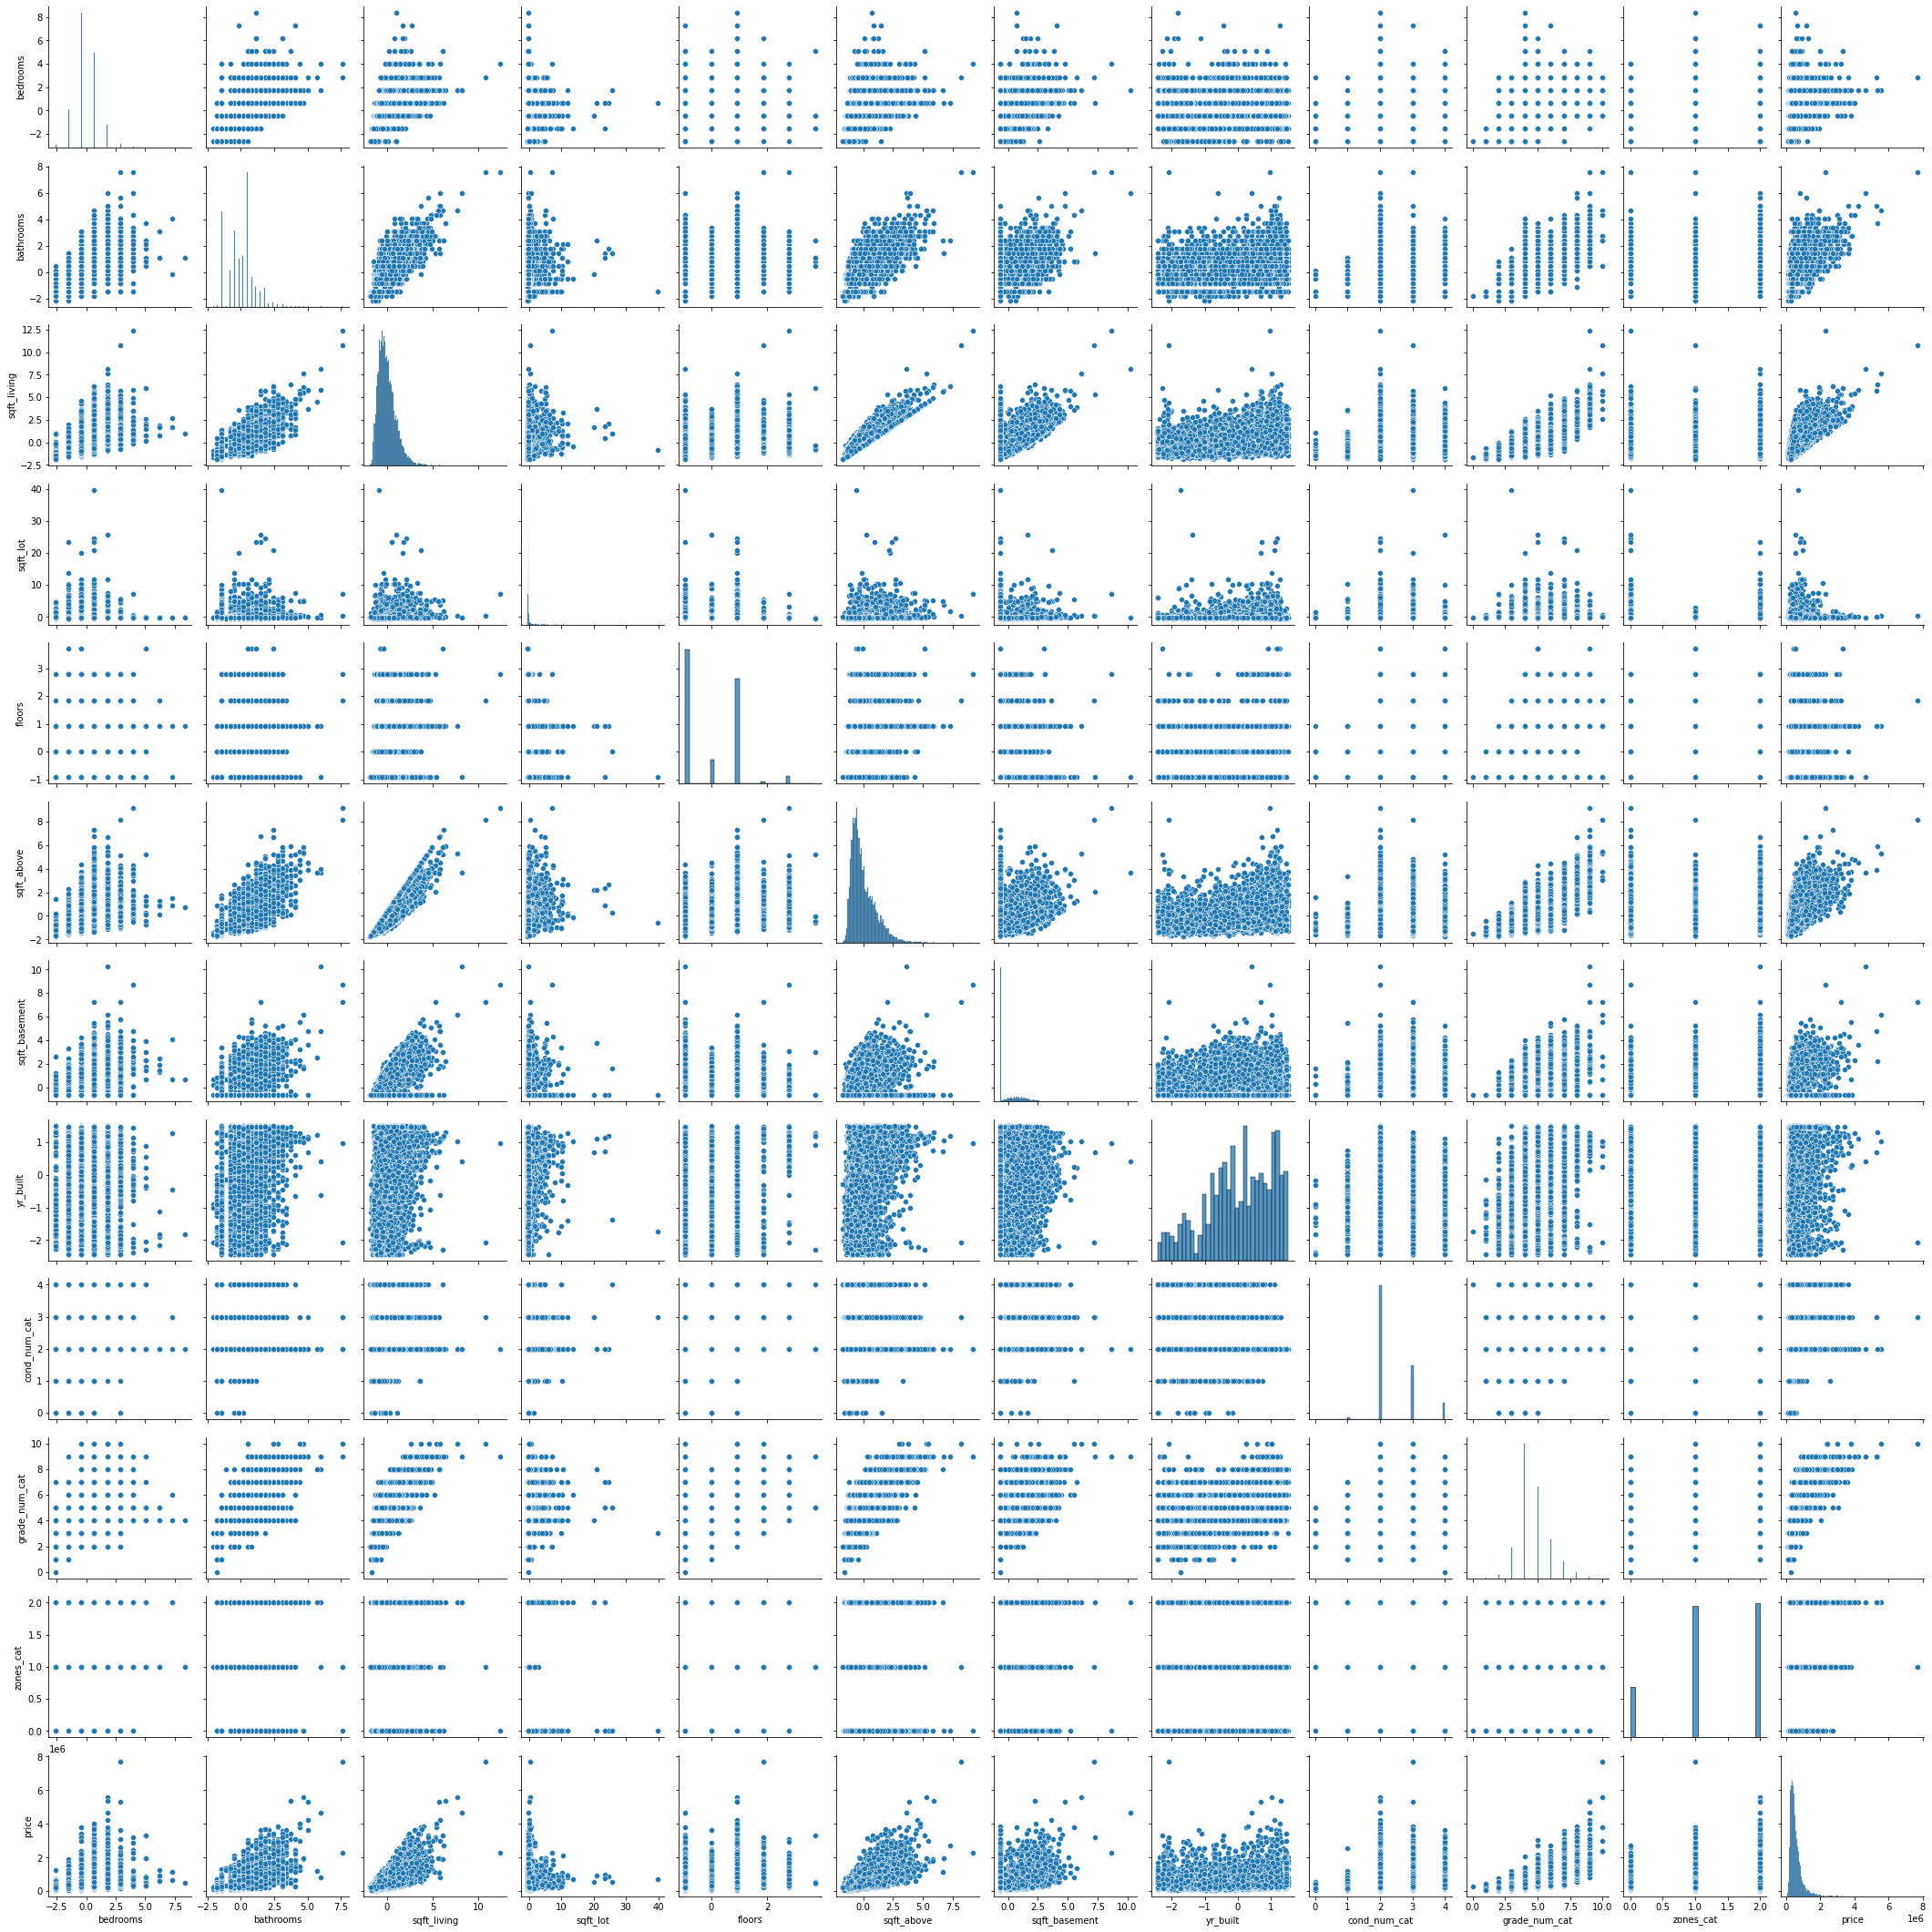

In [43]:
#pairplot
#to be able to understand the pairplot better
sns.pairplot(train_kch)
plt.show()

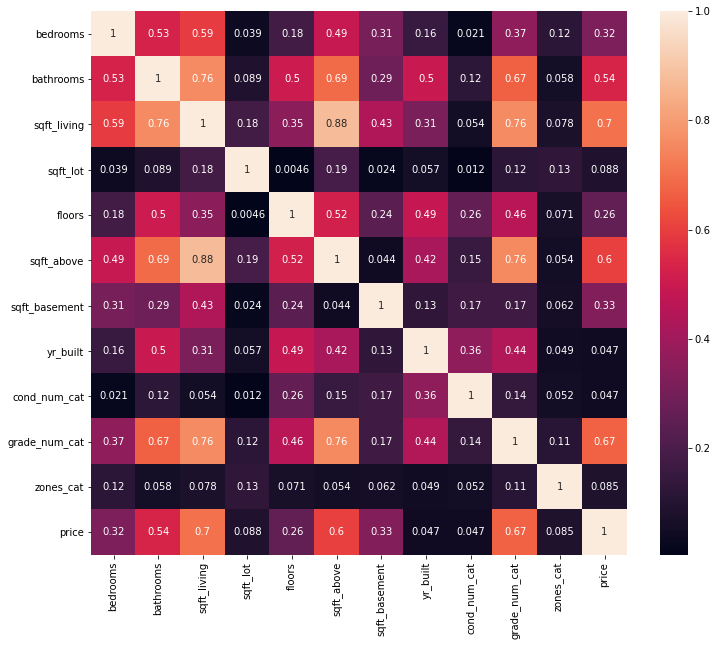

In [44]:
plt.figure(figsize=(12,10))
sns.heatmap(train_kch.corr().abs(), annot=True)
plt.show()

In [45]:
price_corr = train_kch.corr()['price']
price_corr.abs().sort_values(ascending=False)[1:]

sqft_living      0.701469
grade_num_cat    0.670866
sqft_above       0.601325
bathrooms        0.535071
sqft_basement    0.333160
bedrooms         0.321212
floors           0.256883
sqft_lot         0.087953
zones_cat        0.085177
yr_built         0.046539
cond_num_cat     0.046521
Name: price, dtype: float64

-----------------

## Modeling - Dummy Regressor, Simple Linear, Multi Linear

In [46]:
#begining with the Dummy Regressor - the mean of y: price
from sklearn.dummy import DummyRegressor 

#defining X and y for train_kch
X_train_kch = train_kch['sqft_living']
y_train_kch = train_kch['price']

#defining X and y for test_kch
X_test_kch = test_kch['sqft_living']
y_test_kch = test_kch['price']

dummy_mean = DummyRegressor(strategy='mean').fit(X_train_kch, y_train_kch)
y_predict_dummy_mean = dummy_mean.predict(X_test_kch)

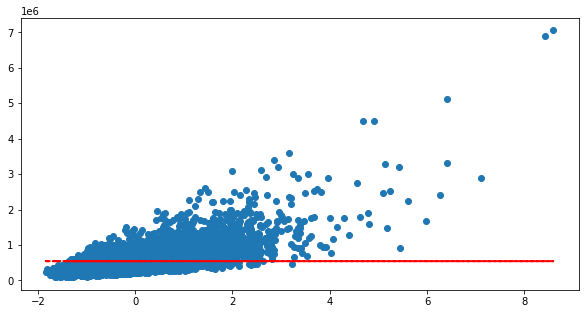

In [47]:
#plotting the Dummy Regressor mean and predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test_kch, y_test_kch)
plt.plot(X_test_kch, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy');

In [48]:
dummy_regr = DummyRegressor(strategy = 'mean')
dummy_regr.fit(X_train_kch, y_train_kch)
dummy_regr.predict(X_train_kch)
dummy_regr.predict(X_test_kch)
dummy_regr.score(X_train_kch, y_train_kch)
dummy_regr.score(X_test_kch, y_test_kch)
dummy_train_RMSE = MSE(y_train_kch, dummy_regr.predict(X_train_kch),squared = False)
dummy_test_RMSE = MSE(y_test_kch, dummy_regr.predict(X_test_kch), squared = False)

print()
print(f'Baseline Model Train Score: {dummy_regr.score(X_train_kch, y_train_kch)}')
print(f'Baseline Model Train RMSE: {round(dummy_train_RMSE)}')
print()
print(f'Baseline Model Test Score: {dummy_regr.score(X_test_kch, y_test_kch)}')
print(f'Baseline Model Test RMSE: {round(dummy_test_RMSE)}')


Baseline Model Train Score: 0.0
Baseline Model Train RMSE: 370163.0

Baseline Model Test Score: -0.0002248013024903628
Baseline Model Test RMSE: 361617.0


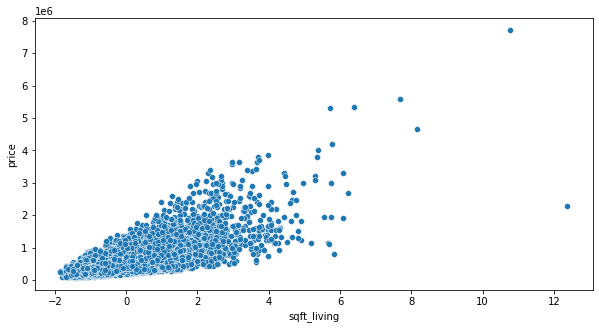

In [51]:
# simple Linear Regression Model with sqft_living 

#plotting sqft_living to see if it has a linear relationship with price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train_kch, x="sqft_living", y="price");

The linear relationship between the two is not particularly strong but it will do.

In [56]:
X_train_simple = train_kch[['sqft_living']]
X_test_simple = test_kch[['sqft_living']]

#LinearRegression
simple_model = LinearRegression()
simple_model.fit(X_train_simple,y_train_kch)

#predicting the data
simple_predict_train = simple_model.predict(X_train_simple)
simple_predict_test = simple_model.predict(X_test_simple)

#getting the scores
simple_model_score_train = simple_model.score(X_train_simple, y_train_kch)
simple_model_score_test = simple_model.score(X_test_simple, y_test_kch)

#Root mean squared error
simple_train_RMSE = MSE(y_train_kch, simple_predict_train, squared = False)
simple_test_RMSE = MSE(y_test_kch, simple_predict_test, squared = False)


print(f'Simple Model (Square feet living) Train score: {simple_model_score_train}')
print(f'Simple Model Train RMSE: {round(simple_train_RMSE)}')
print()
print(f'Simple Model (Square feet living) Test score:{simple_model_score_test}')
print(f'Simple Model Test RMSE: {round(simple_test_RMSE)}')


Simple Model (Square feet living) Train score: 0.4920581575642742
Simple Model Train RMSE: 263815.0

Simple Model (Square feet living) Test score:0.4939471244478427
Simple Model Test RMSE: 257216.0
